In [29]:
# basics imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

# algo and estimators
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [30]:
df = pd.read_csv('../../datasets/50_Startups.csv')

In [31]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [33]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [34]:
state_onehot_encoder = OneHotEncoder(drop='first')
state_dummies = state_onehot_encoder.fit_transform(df[['State']]).toarray()


In [35]:
# convert into dataframe for better readabitity
dummydf = pd.DataFrame(data=state_dummies, columns=['Florida','California'])

In [36]:
# add dummy data to dataframe side by side by giving axis = 1
df = pd.concat([df,dummydf], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,California
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1.0,0.0


In [37]:
# drop the column for which dummy variables are created
df.drop(labels='State', axis=1, inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,California
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [38]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
Florida            0
California         0
dtype: int64

In [39]:
print(df.columns.tolist())

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida', 'California']


In [40]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'California']]
y = df['Profit']

In [41]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size=.2, random_state=0)

In [42]:
model = LinearRegression()
model.fit(trainx,trainy)
score = model.score(testx,testy) * 100
print(score)

93.47068473282424


In [43]:
model.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [44]:
model.intercept_

42554.16761773237

In [45]:
ypred = model.predict(x)

In [46]:
df['predict_profit'] = ypred

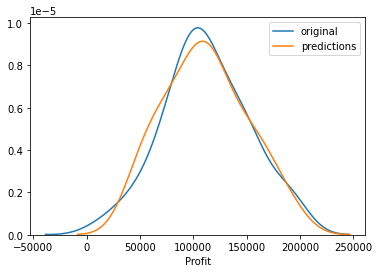

In [47]:
sns.distplot(y,hist=False,label='original')
sns.distplot(ypred, hist=False,label='predictions')
plt.legend()
plt.show()

In [48]:
def save_model(path,model):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    return path

In [49]:
save_model('../../models/startups_profit_prediction.pkl',model)
save_model('../../models/startup_state_hot_encoder.pkl',state_onehot_encoder)

'../../models/startup_state_hot_encoder.pkl'

## MODEL TESTER

In [55]:
def load_model(path):
    with open(path,'rb') as f:
        return pickle.load(f)

encoder = load_model(r'C:\Users\Mansi\Desktop\ML\models\startup_state_hot_encoder.pkl')
model = load_model(r'C:\Users\Mansi\Desktop\ML\models\startups_profit_prediction.pkl')

rnd = int(input('enter R&D spend:'))
admin = int(input('enter admin spend:'))
mkt = int(input('enter marketing spend:'))
state = input("select state (California,Florida,New York)")

state_dummies = encoder.transform([[state]])
data = np.array([[rnd,admin,mkt]])
input_data= np.append(data,state_dummies.toarray())
profit = model.predict(input_data.reshape(1,-1))

print(profit)

[199269.43527901]
